# Q-1.

### Business Understanding:

    In this problem statement we have to build a model which can predict likes and time since posted on Instagram based on   the given features. 

In [2]:
# importing libraries

# To read data and numeric operations
import numpy as np    # for mathematical operation
import pandas as pd    # for data manipulation and analysis

# Graph plotting library
import matplotlib.pyplot as plt
import seaborn as sns

# To filter words
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [3]:
# Reading dataset

df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\instagram_reach.csv')
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


### Let's Understand the data

**Dataset information**

**Content**

The dataset contains 101 rows and 6 main features namely 'UserName', 'Caption', 'Followers', 'HashTags', 'Time Since Posted', 'Likes'. The target feature or value to be predicted are ' 'Time Since Posted', 'Likes'.

#### Feature Information:

**USERNAME**: User name of the user

**Caption**: Captions used in the post

**Followers**: Number of followers the user has

**Time since posted**: Time duration after posting a content

**Likes**: Number of likes got on the post


**When Do people get more likes on a social media platform like Instagram?**

When a User has more followers, then the post reaches out to more peoples and chances are more to get more likes. To identify a linear relationship in data and build a simple Machine Learning model and put your best foot forward toward Machine Learning.

## Basic analysis and data preprocessing

In [4]:
# Shape of the data

df.shape

(100, 8)

In [5]:
# Columns of the data

df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [77]:
# Data types of the dataset

df.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [7]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
# Basic information on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [16]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['USERNAME', 'Caption', 'Hashtags', 'Time since posted']


In [76]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['Followers', 'Likes']


In [9]:
# Checking nul values

df.isna().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

#### Observation:
- There are 6 missing data in "Caption" column

In [8]:
# Checking duplicate records

df.duplicated().sum()

0

##  EDA
### Univariate Analysis

**"USERNAME"**

In [27]:
df['USERNAME'].nunique()

95

#### Obseravtion
- There are duplicate usernames in the dataset

**"Caption"**

In [32]:
df[df['Caption'].duplicated()]

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
67,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


#### Obseravtion
- There are duplicate captions in the dataset

**"Followers"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Followers', ylabel='Density'>

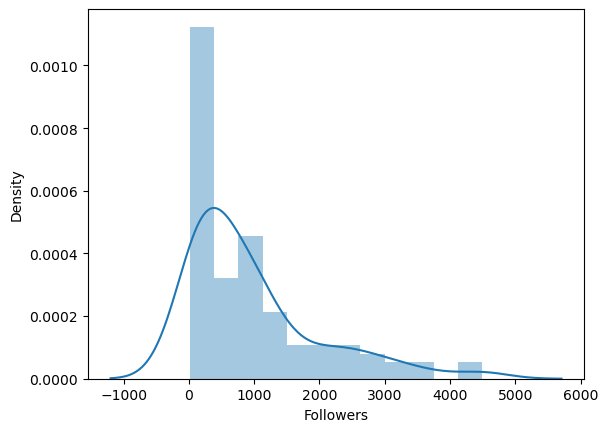

In [35]:
sns.distplot(df['Followers'])

In [46]:
# User having maximum follower

df['Followers'].max()

4496

In [70]:
df[df['Followers']==4496]['USERNAME']

23    mikequindazzi
59    mikequindazzi
Name: USERNAME, dtype: object

#### Observation:
- 'mikequindazzi' user has the maximum number of followers

In [47]:
# User having minimum follower

df['Followers'].min()

11

#### Obseravtion
- 'Followers' column data is  skewed to the right

**"Hashtags"**

In [37]:
df['Hashtags'].value_counts()

#DeepLearning #MachineLearning#ArtificialIntelligence #IoT #BigData#HealthTech #IIoT #Mobile #Infographics #smartphones #AI                                                                                                                                                                                                                                                                           2
#Bitcoin #Cryptocurrency#Ethereum #stockmarket #currencytrading#digitalmarketing #litecoin #Currency #ico#token #mining #BitcoinExchange#Blockchain #money #community #crypto#CryptoExchange #fiat #forex #altcoin#stocks #profit  #investor #investment#trader#forextrader #nyse #broker #forexnews#forexanalysis                                                                                    2
#MachineLearning #AI #DataAnalytics #DataScienc #DataLake                                                                                                                                                               

#### Obseravtion
- Most of the 'Hashtags' are unique

**"Time since posted"**

In [42]:
df['Time since posted'].value_counts()

2 hours     57
3 hours     19
4 hours     13
7 hours      3
11 hours     2
8 hours      1
9 hours      1
5 hours      1
20 hours     1
14 hours     1
24 hours     1
Name: Time since posted, dtype: int64

#### Obseravtion
- Dataset has miximum number of posts with '2 hours' gap

 **"Likes"**

Text(0.5, 0, 'Likes')

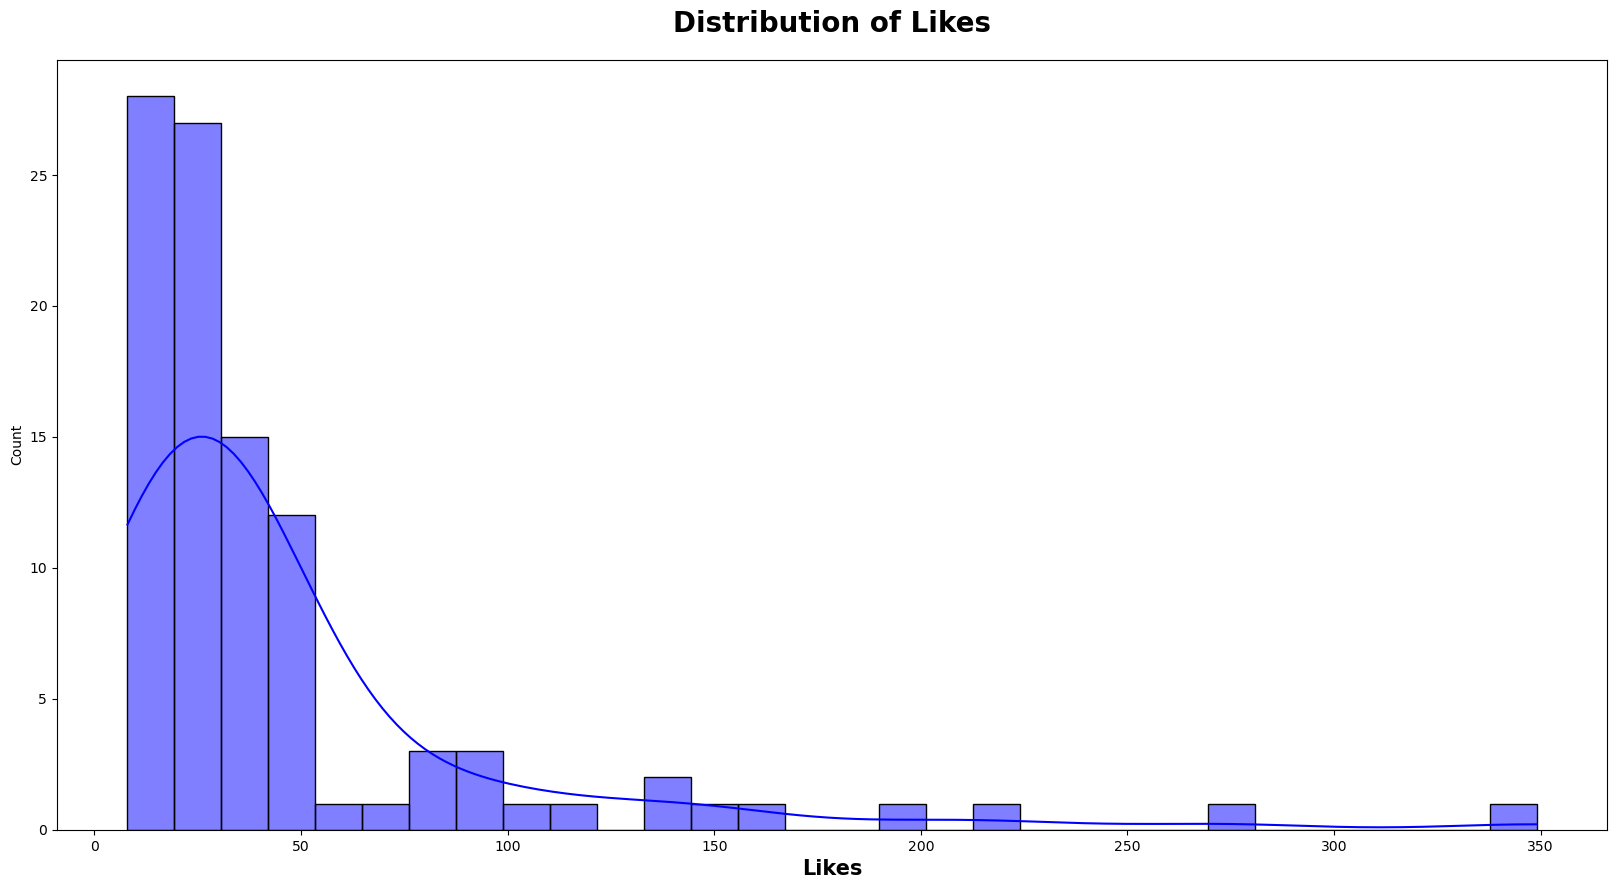

In [43]:
# Hostogram

plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Likes", x=df.Likes, color='b', kde=True)
plt.title("Distribution of Likes", weight='bold', fontsize=20, pad=20)
plt.xlabel('Likes', weight='bold', fontsize=15)

In [49]:
# User having mac=ximum like

df['Likes'].max()

349

In [75]:
df[df['Likes']==349][['USERNAME', 'Followers']]

,USERNAME,Followers
55,astrokpj,3448


#### Obseravtion
- astrokpj' has maximum like and 3448 followers

In [51]:
# User having maximum like

df['Likes'].min()

8

In [74]:
df[df['Likes']==8][['USERNAME', 'Followers']]

,USERNAME,Followers
41,ricmiqads,105


#### Obseravtion
- 'ricmiqads' has maximum like and 105 followers

In [55]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

### Bivariate Analysis numerical feature

**Followers and Likes**

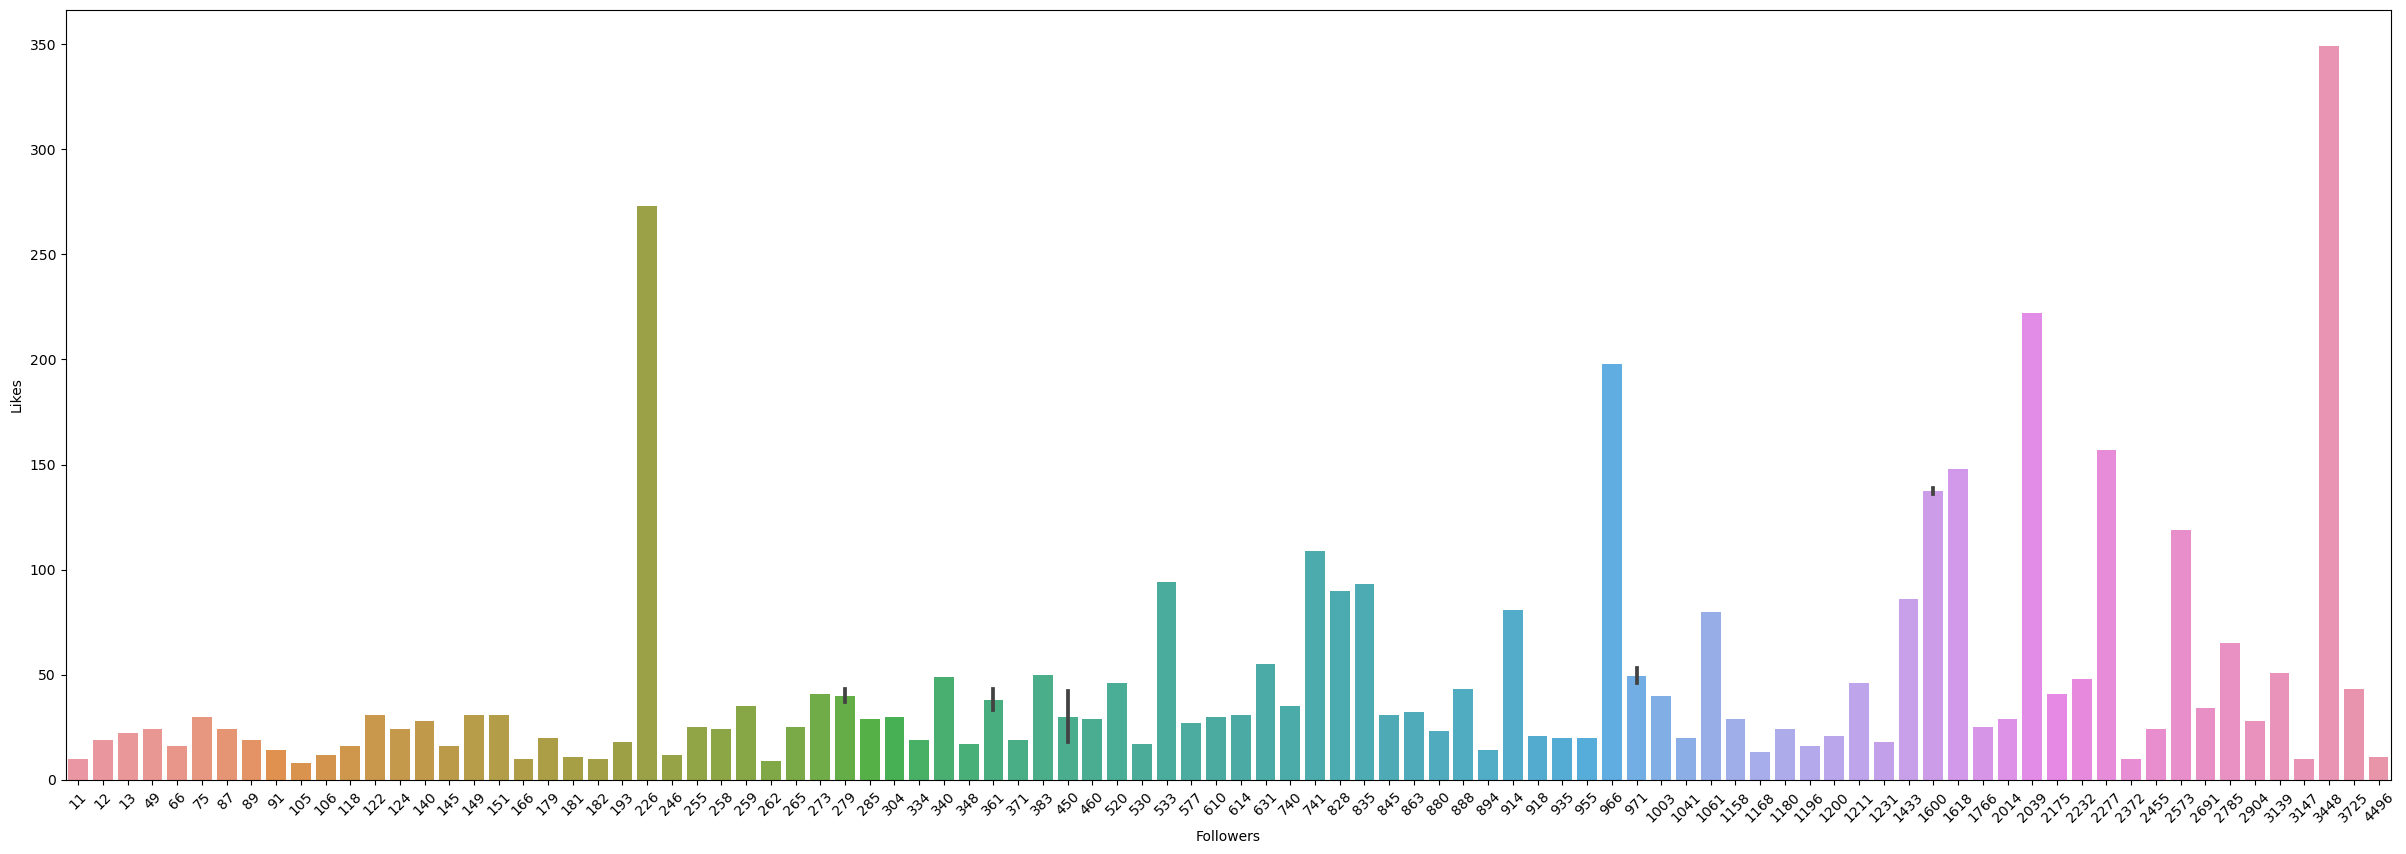

In [62]:
# Barplot

plt.figure(figsize=(30,10))
sns.barplot(x = 'Followers',
            y = 'Likes',
            data = df)
 
# Show the plot
plt.xticks(rotation=45)
plt.show()

#### Obseravtion
- Users with more followers have more likes

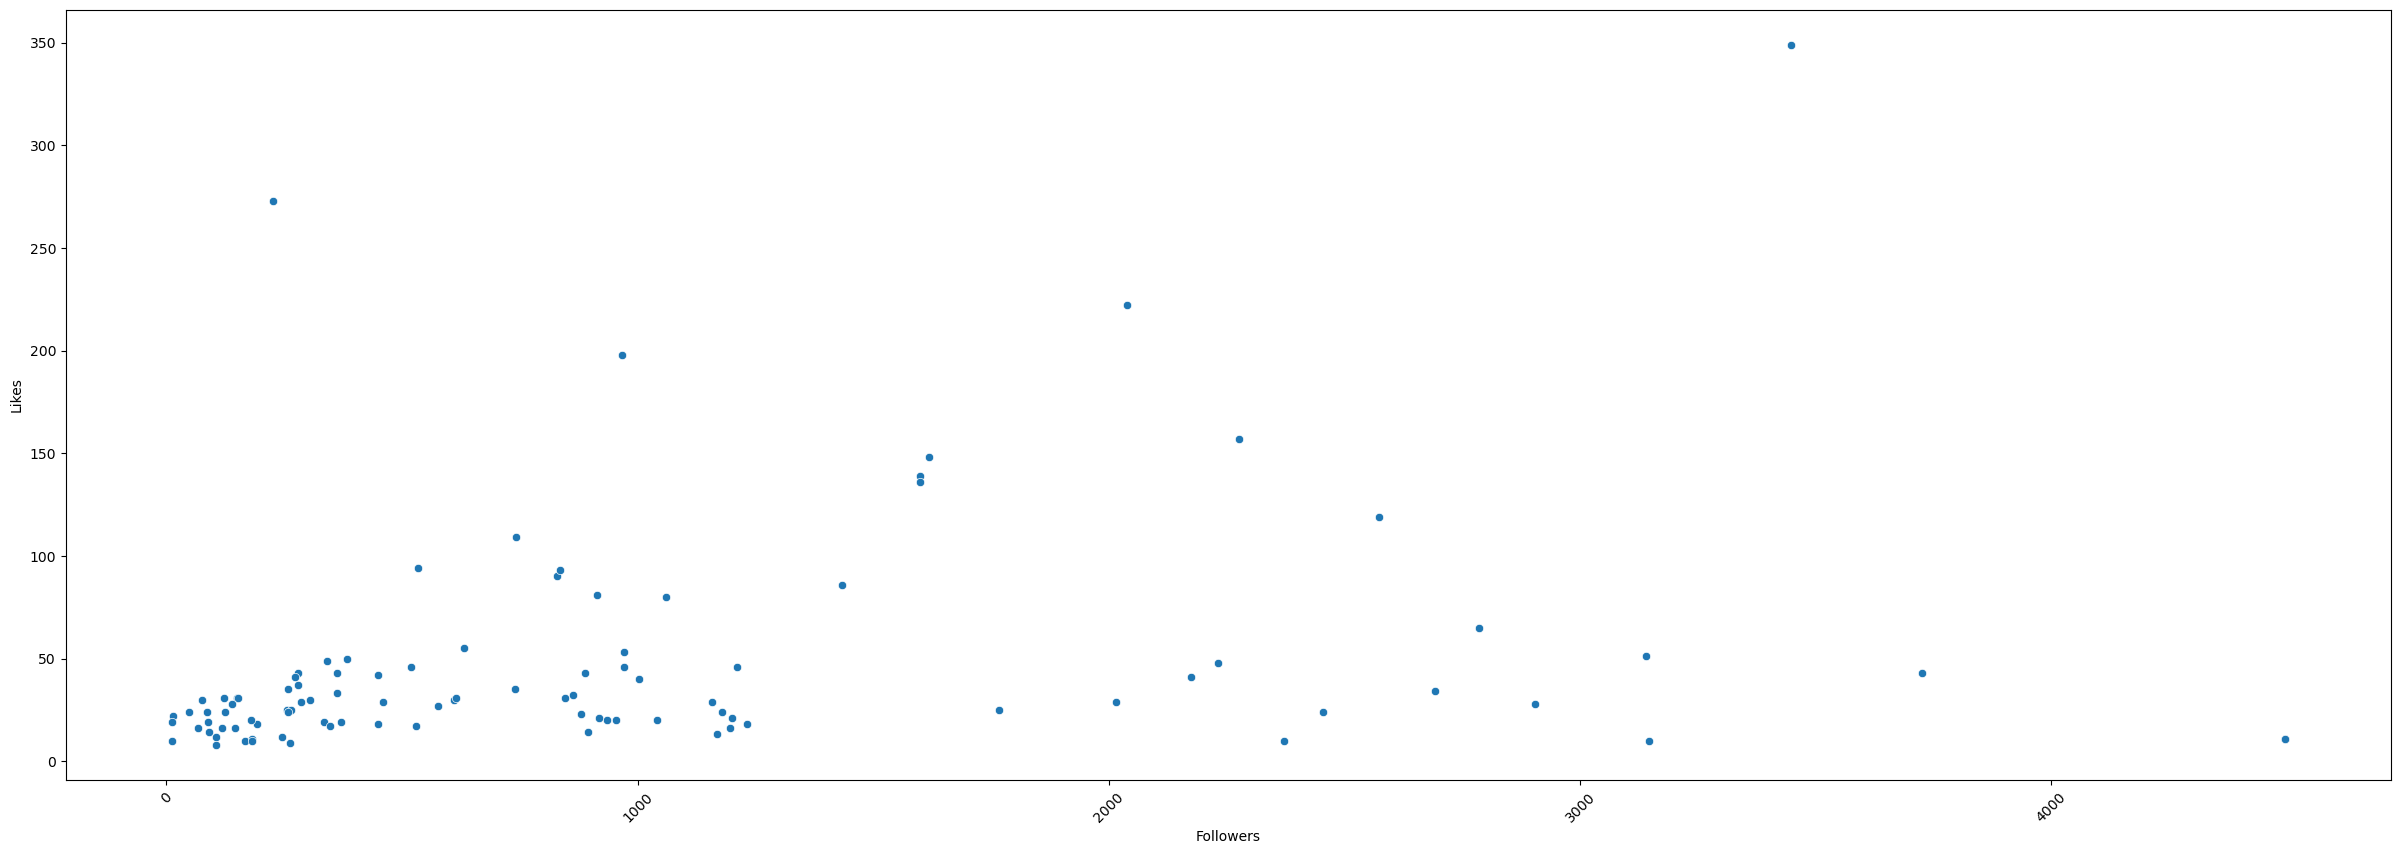

In [63]:
# Scatterplot

plt.figure(figsize=(30,10))
sns.scatterplot(x = 'Followers',
            y = 'Likes',
            data = df)
 
# Show the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Dropping unecssary 'S.No', 'Unnamed: 0' column

df.drop(['S.No', 'Unnamed: 0'], axis=1, inplace=True)

### Lets filter out and fing the stem words

In [64]:
# Function to find the most common words in a column

def WordCloudPlotter(column):
    colData = df[column]
    textCloud = ''
    
    # text processing
    # converting colums to a 
    # single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # getting word cloud  -> filtered word
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    # plotting word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(column))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

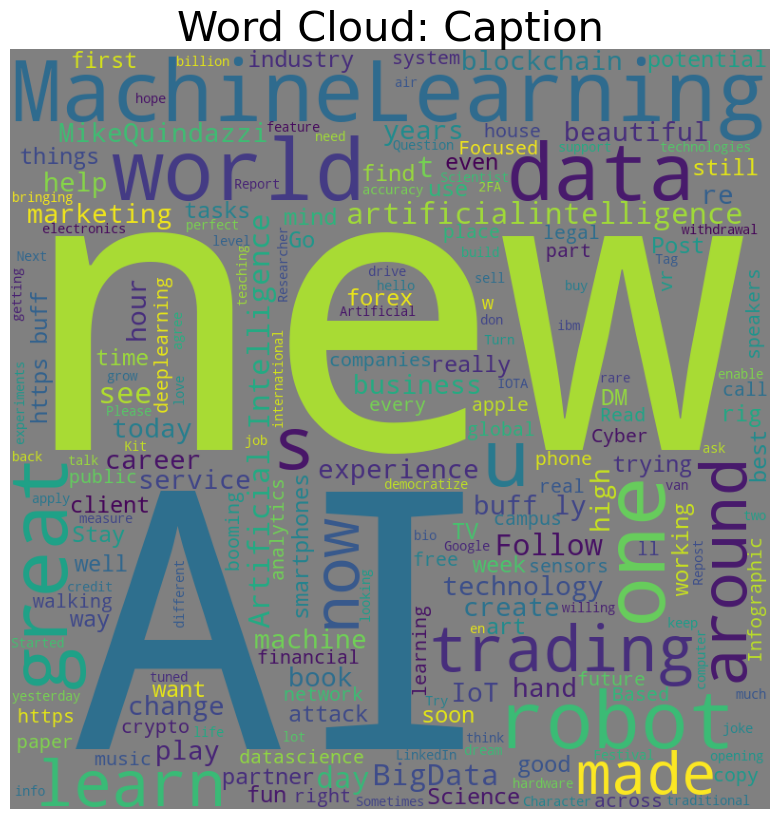

In [65]:
# Plotting word clouds for Captions column

WordCloudPlotter('Caption')

This Word Cloud indicates the following:

1.) This data sets is collected from data sceince enthusiasts.

2.) It is emphasizing on the need of AI-ML.

3.) Fields of applications are being talked about

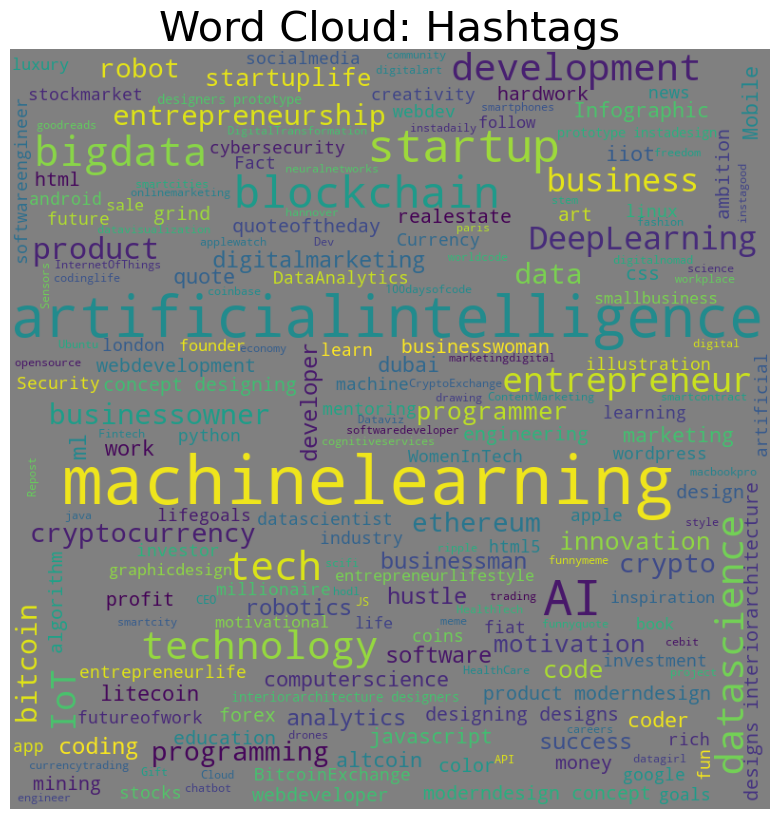

In [12]:
# Plotting word clouds for Captions and Hashtags column

WordCloudPlotter('Hashtags')

In [13]:
# removing hours from 'Time since posted' column and typecasting to int

df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [16]:
# Function to plot scatter plot

def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = df, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

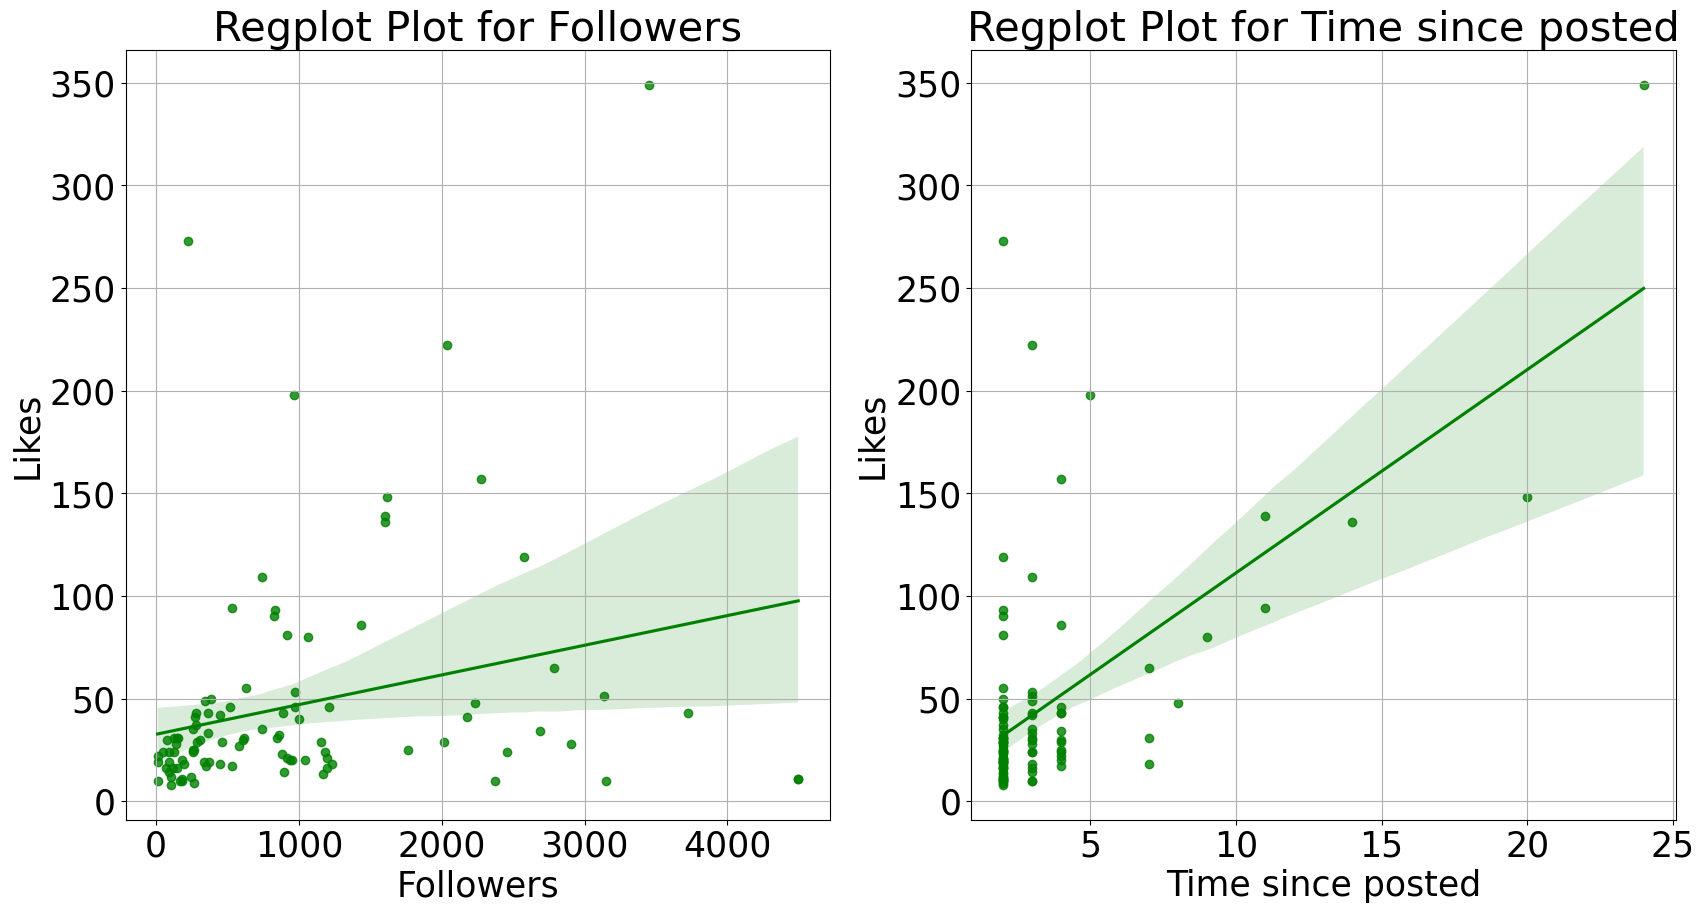

In [17]:
# Scatter plot to display relationship between
# Likes and Followers
# Likes and Time since posted

PlotDataGiveConclusion2(['Followers', 'Time since posted'])

### Feature Selection

In [18]:
# Considering 'Followers' and 'Time Posted' as feature
# target be number of likes.

featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')

In [19]:
# Getting the maximum Likes

maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [20]:
#diving targets by max values

targets = targets/maxValLikes  # To get the data with in a range of 0-1

### Feature Scaling

In [21]:
# Standardizing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

### Model Building

In [22]:
# Making Gradeint Boosting Regressor model

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

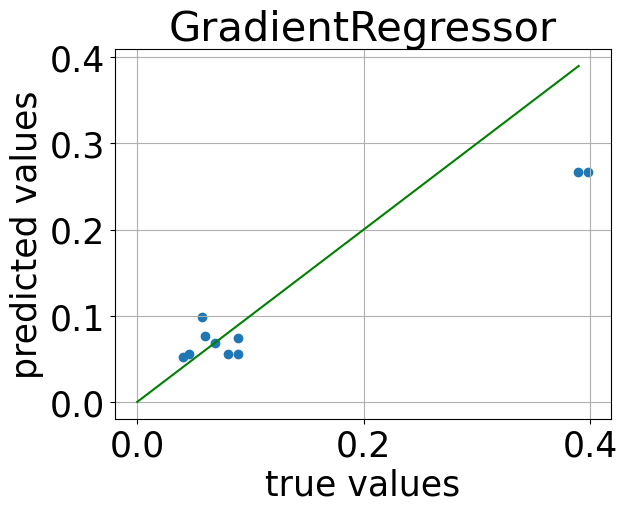

In [23]:
# Prediction, Plot

predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect is still workable. Lets do some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [24]:
# defining function to plot Likes and Time with respect to followers

def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

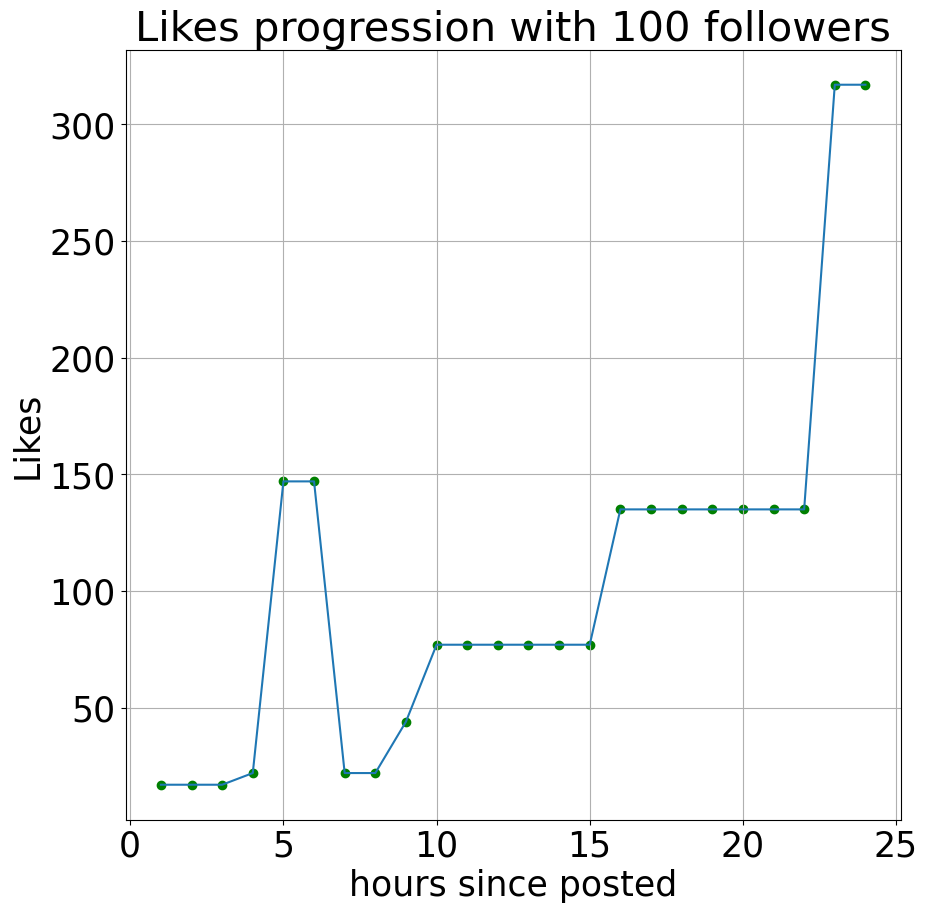

In [29]:
## Taking the Number of Followers as 100

PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

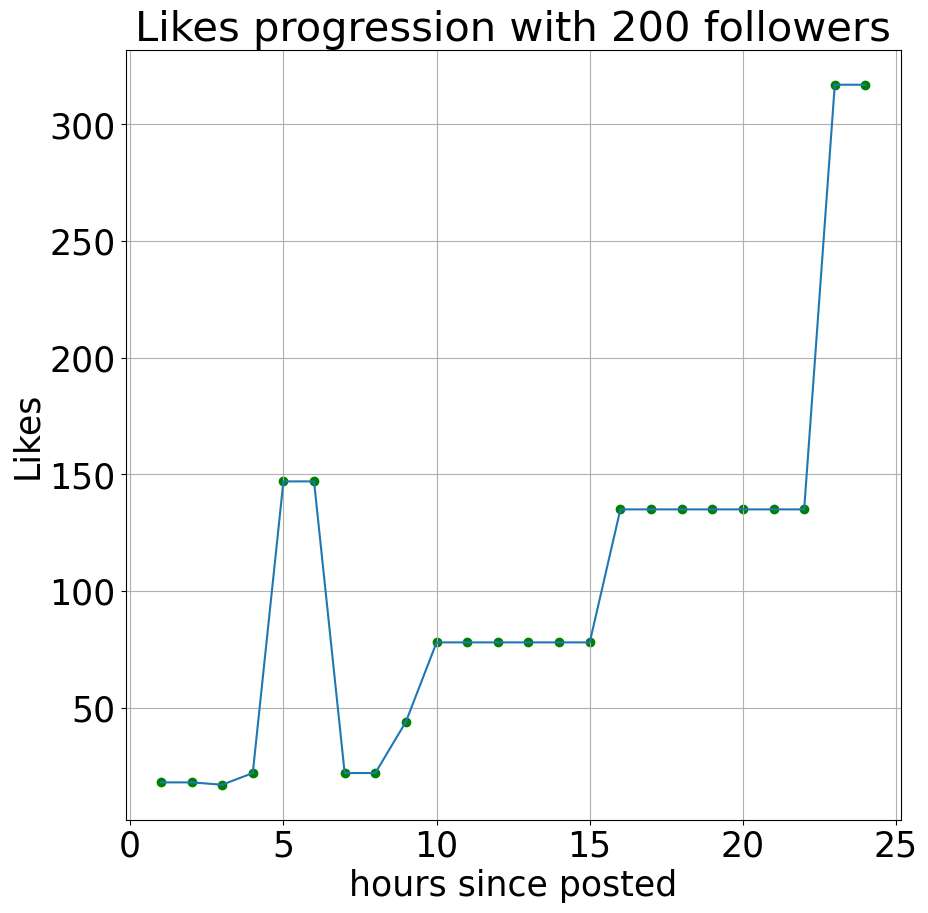

In [26]:
## Taking the Number of Followers as 200

PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

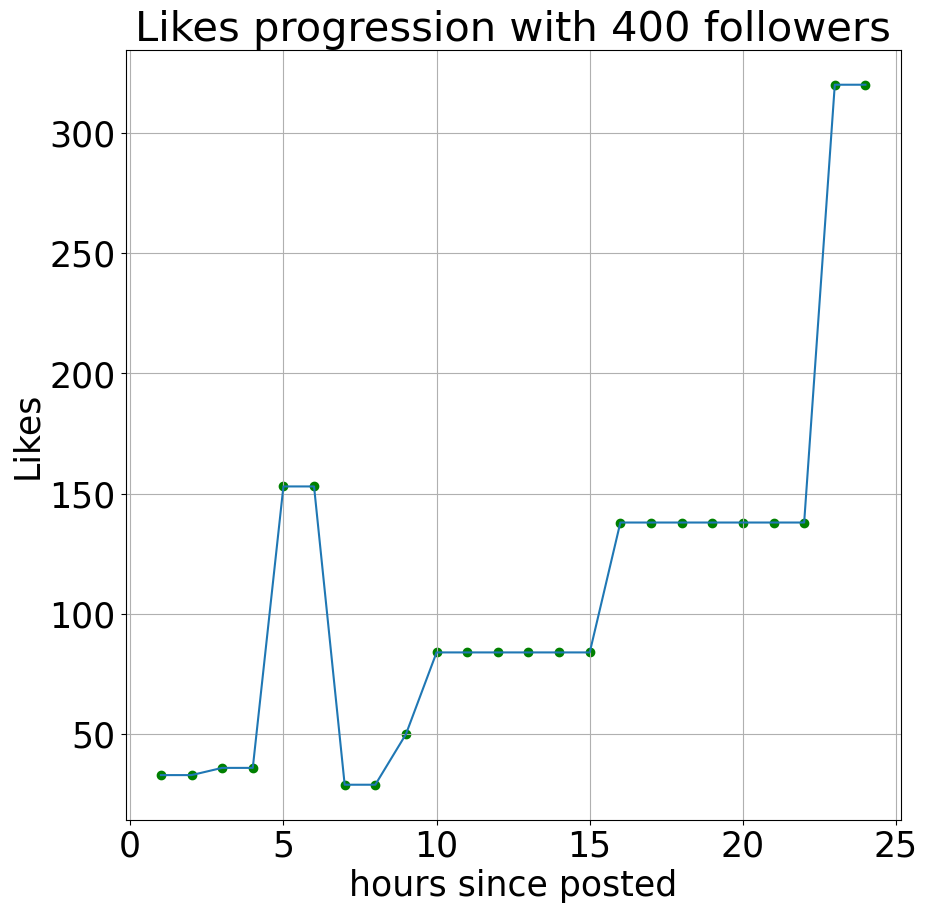

In [27]:
## Taking the Number of Followers as 400

PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

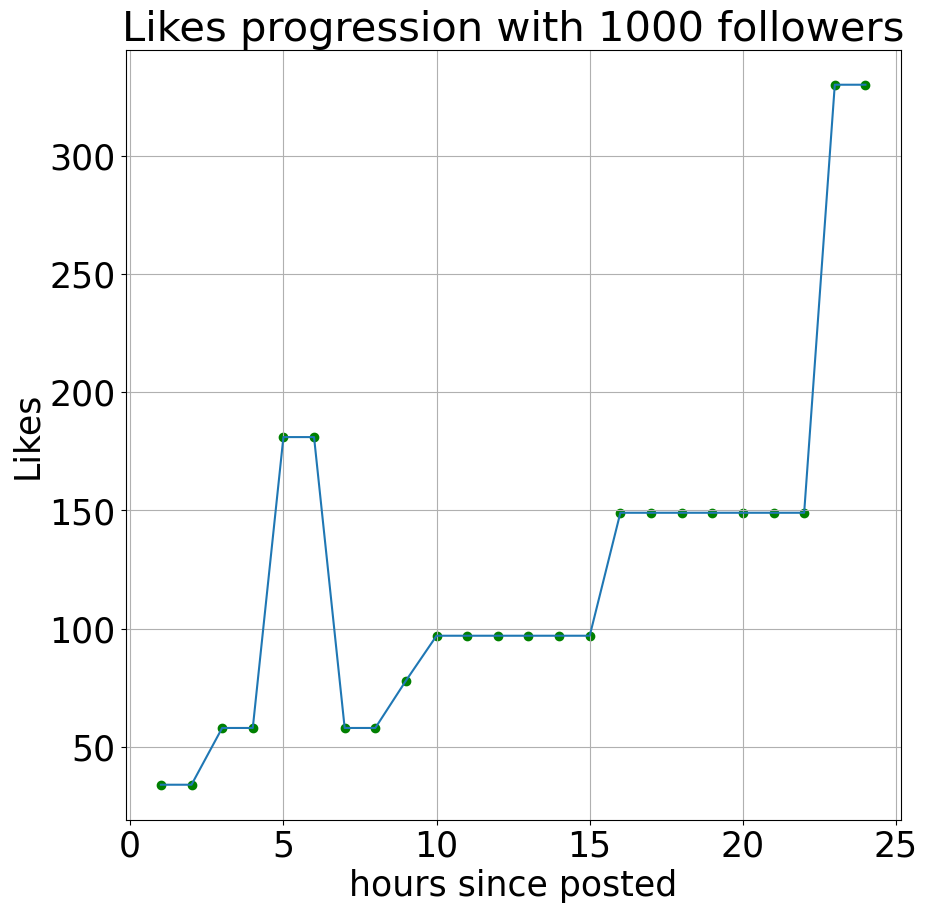

In [28]:
## Taking the Number of Followers as 1000

PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

According to this model we can infer one thing, that is, If you have higher number of followers your post will gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers yeild only about 20% increase in likes

In [30]:
## Function to display likes with followers

def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

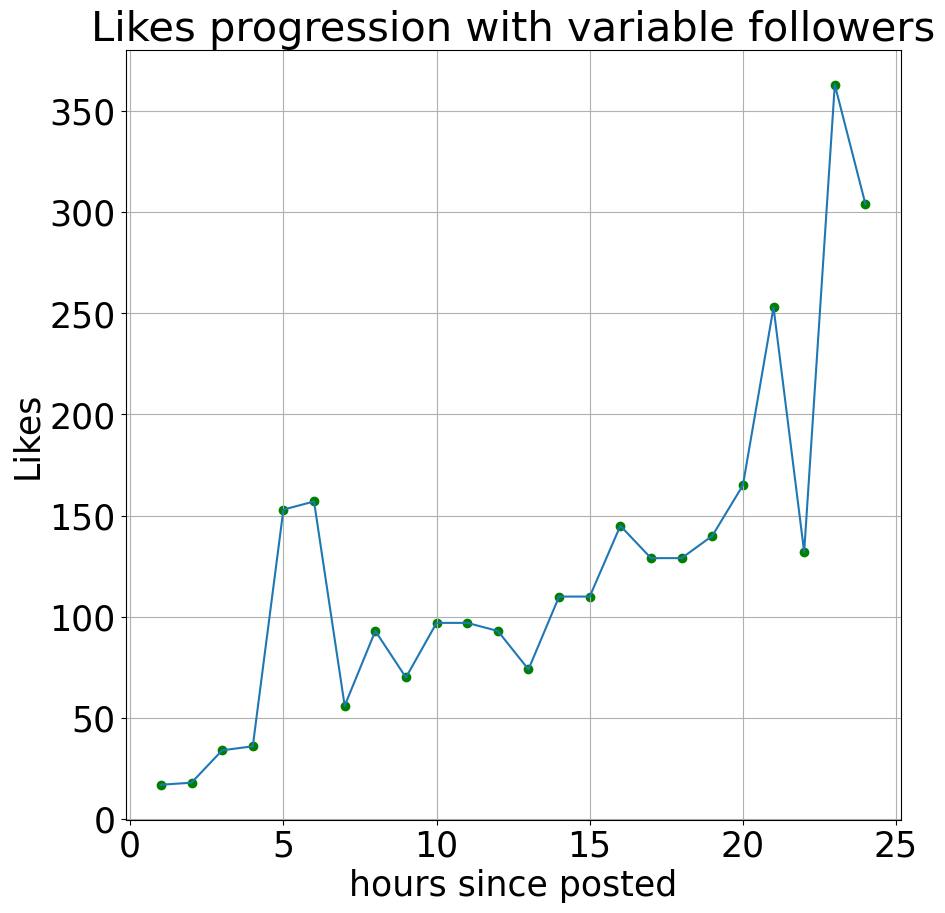

In [31]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

If our predictive model is right, and case 2 is true then around 15 hours posts like will grow exponentially !! (In my opnion I dont believe so)

Thanks, If you have reached here and read the entire Notebook Also, Todo In, future versions Replacing single GBR model with an essembled model